In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import hist
import coffea
import uproot

In [4]:
f = uproot.open("output2/trip4_slimmed_ntuple_QCD_HT1500to2000_TuneCP5_13TeV-madgraph-pythia8_v2_118.root")
f.classnames()


{'events;1': 'TTree'}

In [5]:
events = f['events']
events.show()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Run                  | float                    | AsDtype('>f4')
Lumi                 | float                    | AsDtype('>f4')
Event                | float                    | AsDtype('>f4')
xscn                 | float                    | AsDtype('>f4')
trigger_results      | float                    | AsDtype('>f4')
mds63                | float                    | AsDtype('>f4')
mds6332              | float                    | AsDtype('>f4')
jmds63               | float                    | AsDtype('>f4')
jmds6332             | float                    | AsDtype('>f4')
sixpt                | float                    | AsDtype('>f4')
ak4_HT               | float                    | AsDtype('>f4')
loose6j_qgl          | float                    | AsDtype('>f4')
tight6j_qgl          | float                    | AsDtype(

In [99]:
br = events.arrays()


Text(0.5, 0, 'Inv Mass [GeV]')

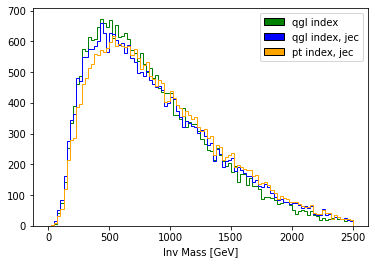

In [110]:
from awkward import flatten 
from matplotlib.patches import Rectangle

cmap = plt.get_cmap('jet')
low = cmap(0.5)
medium =cmap(0.25)
high = cmap(0.8)

handles = [Rectangle((0,0),0.8,0.8,color=c,ec="k") for c in ['green','blue', 'orange']]
labels= ["qgl index","qgl index, jec", "pt index, jec"]
plt.legend(handles, labels)

plt.hist(flatten(br['trip_mass']), bins= 100, histtype='step', color='green',range=(0,2500))
plt.hist(flatten(br['jtrip_mass']), bins= 100, histtype='step', color='blue',range=(0,2500))
plt.hist(flatten(br['ptrip_mass']), bins= 100, histtype='step', color='orange',range=(0,2500))
plt.xlabel("Inv Mass [GeV]")

In [1]:
good_inv_masses = []

for event in br['jtrip_mass']:
    pair = [event[0],event[1]]
    asym = abs(event[0] - event[1])/(event[0] + event[1])
    for i in range (1, 5):
        if (abs((event[2*i] - event[2*i+1])/(event[2*i] + event[2*i+1])) < asym ):
            pair = [event[2*i],event[2*i+1]]
            asym = abs((event[2*i] - event[2*i+1])/(event[2*i] + event[2*i+1]))
            
    good_inv_masses.append(pair)
plt.hist(flatten(good_inv_masses), bins= 100, range=(0,2500))
plt.xlabel("Inv Mass [GeV]")

NameError: name 'br' is not defined

Text(0.5, 0, 'Inv Mass [GeV]')

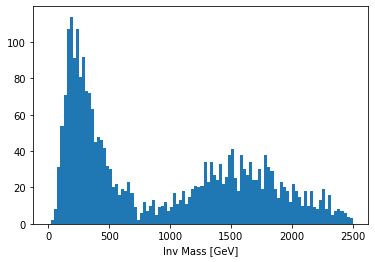

In [107]:
bad_inv_masses = []

for event in br['jtrip_mass']:
    pair = [event[0],event[1]]
    asym = abs(event[0] - event[1])/(event[0] + event[1])
    for i in range (1, 5):
        if (abs((event[2*i] - event[2*i+1])/(event[2*i] + event[2*i+1])) > assym ):
            pair = [event[2*i],event[2*i+1]]
            asym = abs((event[2*i] - event[2*i+1])/(event[2*i] + event[2*i+1]))
    bad_inv_masses.append(pair)
plt.hist(flatten(bad_inv_masses), bins= 100, range=(0,2500))
plt.xlabel("Inv Mass [GeV]")